In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset_path = '/content/drive/MyDrive/BT1_CS231/HoaVietNam'

BT1

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans


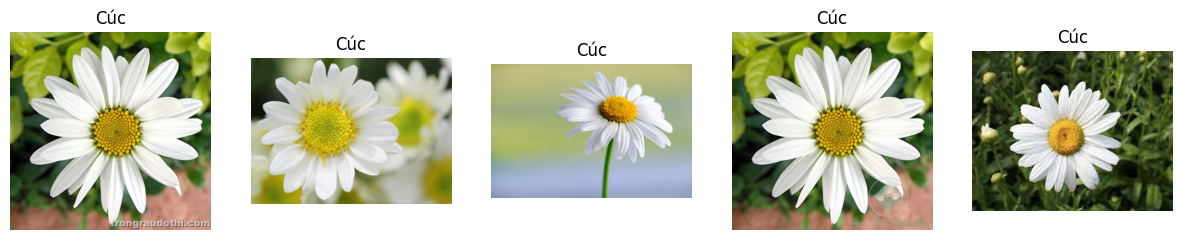

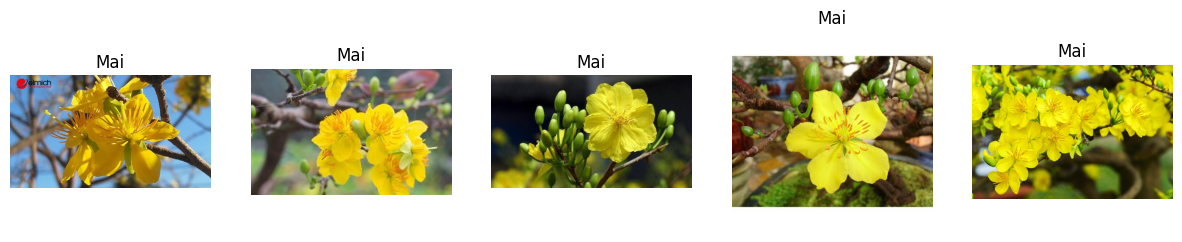

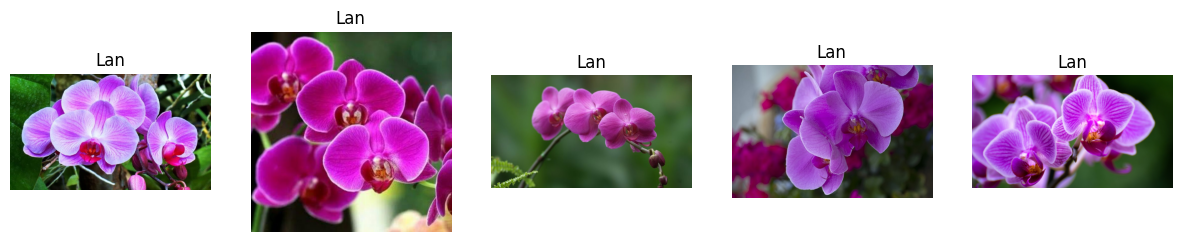

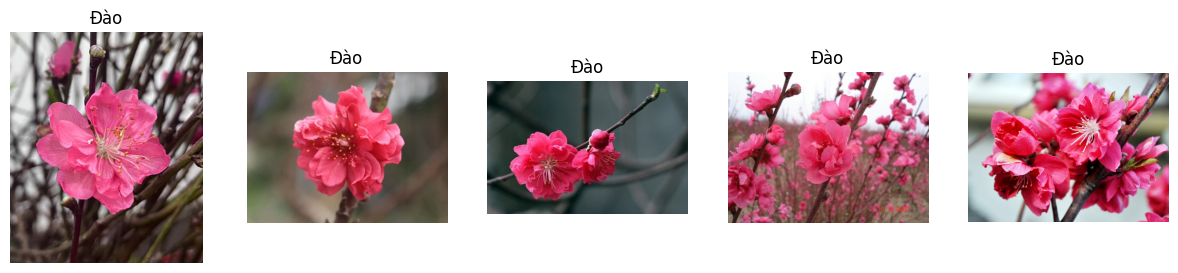

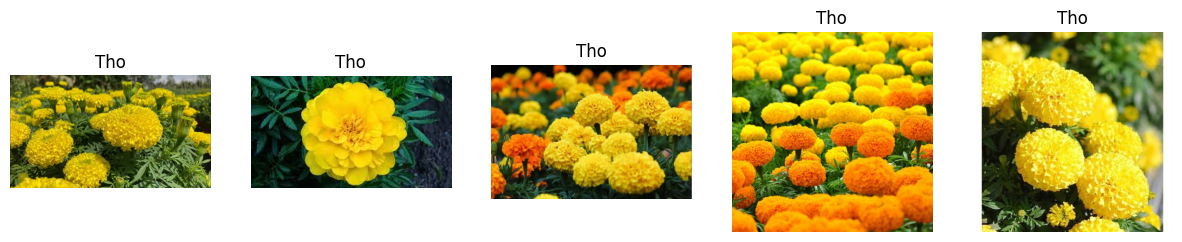

In [4]:
# Function to visualize images from a folder
def show_sample_images(folder_path, label_name, num_images=5):
    images = []
    for i, filename in enumerate(os.listdir(folder_path)):
        if i >= num_images:
            break
        img = cv2.imread(os.path.join(folder_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)

    plt.figure(figsize=(15, 3))
    for idx, img in enumerate(images):
        plt.subplot(1, num_images, idx + 1)
        plt.imshow(img)
        plt.title(f"{label_name}")
        plt.axis('off')
    plt.show()

show_sample_images(os.path.join(dataset_path, "train", "Cuc"), "Cúc")
show_sample_images(os.path.join(dataset_path, "train", "Mai"), "Mai")
show_sample_images(os.path.join(dataset_path, "train", "Lan"), "Lan")
show_sample_images(os.path.join(dataset_path, "train", "Dao"), "Đào")
show_sample_images(os.path.join(dataset_path, "train", "Tho"), "Tho")

In [5]:
def extract_color_histogram(image_path, bins=(16, 16, 16)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))  # Resize for uniformity
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()


In [6]:
# Function to load data
def load_dataset(folder_path):
    X, y = [], []
    for label in os.listdir(folder_path):
        label_folder = os.path.join(folder_path, label)
        if os.path.isdir(label_folder):
            for img_file in os.listdir(label_folder):
                img_path = os.path.join(label_folder, img_file)
                features = extract_color_histogram(img_path)
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

# Load train and test
X_train, y_train = load_dataset(os.path.join(dataset_path, "train"))
X_test, y_test = load_dataset(os.path.join(dataset_path, "test"))

# Encode labels to integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [7]:
def train_and_evaluate(X_train, y_train, X_test, y_test, weight, metric):
    model = KNeighborsClassifier(n_neighbors=7, weights=weight, metric=metric)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc, y_pred

# Test one combination
acc, pred = train_and_evaluate(X_train, y_train, X_test, y_test, 'uniform', 'euclidean')
print(f"Accuracy: {acc:.4f}")


Accuracy: 0.8400


uniform, braycurtis: 0.8800
uniform, canberra: 0.7000
uniform, correlation: 0.8400
uniform, cosine: 0.8400
uniform, euclidean: 0.8400
uniform, minkowski: 0.8400
distance, braycurtis: 0.8800
distance, canberra: 0.7000
distance, correlation: 0.8600
distance, cosine: 0.8400
distance, euclidean: 0.8400
distance, minkowski: 0.8400


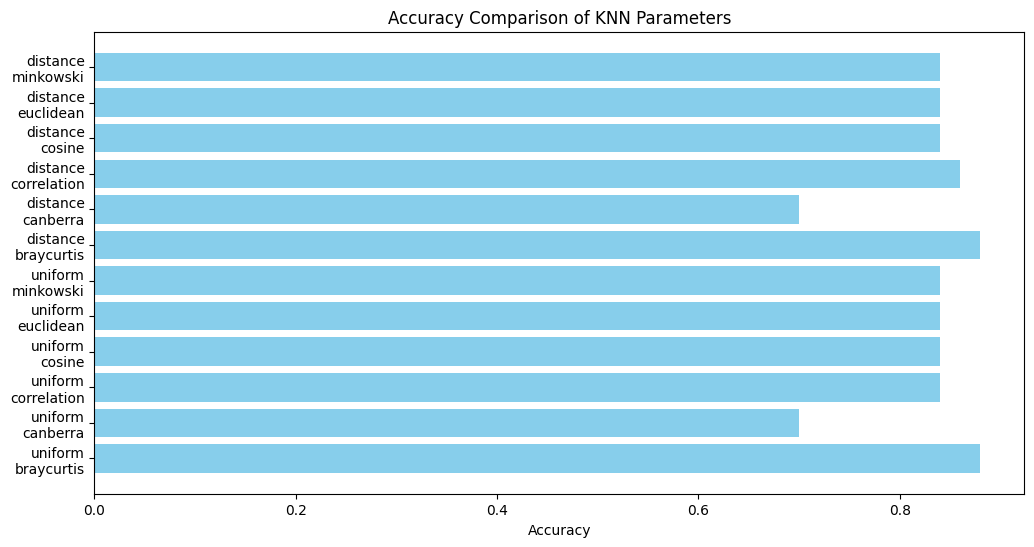

Best Accuracy: 0.8800
Best Weight: uniform
Best Metric: braycurtis


In [8]:
# Test Multiple Parameters & Visualize Results
weights_options = ['uniform', 'distance']
metrics_options = ['braycurtis', 'canberra', 'correlation', 'cosine', 'euclidean', 'minkowski']

results = {}
best_acc = 0
best_weight = None
best_metric = None
for weight in weights_options:
    for metric in metrics_options:
        try:
            acc, _ = train_and_evaluate(X_train, y_train, X_test, y_test, weight, metric)
            results[(weight, metric)] = acc
            print(f"{weight}, {metric}: {acc:.4f}")
            if (best_acc < acc):
                best_acc = acc
                best_weight = weight
                best_metric = metric
        except Exception as e:
            print(f"Error with {weight}, {metric}: {e}")

# Plot the results
labels = [f"{w}\n{m}" for w, m in results.keys()]
scores = list(results.values())

plt.figure(figsize=(12, 6))
plt.barh(labels, scores, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Accuracy Comparison of KNN Parameters")
plt.show()

print(f"Best Accuracy: {best_acc:.4f}")
print(f"Best Weight: {best_weight}")
print(f"Best Metric: {best_metric}")

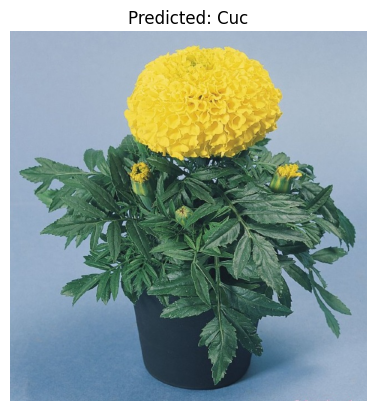

In [9]:
### Predict and Visualize a New Image
# Best model training
best_weight = 'distance'
best_metric = 'euclidean'
model = KNeighborsClassifier(n_neighbors=7, weights=best_weight, metric=best_metric)
model.fit(X_train, y_train)

# Predict and show function
def predict_and_show(model, image_path, label_encoder):
    features = extract_color_histogram(image_path).reshape(1, -1)
    label = model.predict(features)[0]
    label_name = label_encoder.inverse_transform([label])[0]
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(f"Predicted: {label_name}")
    plt.axis('off')
    plt.show()

# Example: predict new image
image_path = '/content/drive/MyDrive/BT1_CS231/HoaVietNam/test/Tho/0039.jpg'
predict_and_show(model, image_path, label_encoder)


BT2:

In [10]:
def extract_color_moments(image_path):
  image = cv2.imread(image_path) # Đọc ảnh
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  mean = np.mean(hsv, axis=(0, 1))
  std = np.std(hsv, axis=(0, 1))
  skewness = np.mean(((hsv - mean) / (std + 1e-6)) ** 3, axis=(0, 1))
  return np.concatenate([mean, std, skewness])

In [11]:
def extract_dominant_color(image_path, k=3):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(image)
    dominant_colors = kmeans.cluster_centers_
    return dominant_colors.flatten()

In [12]:
def load_dataset(dataset_path, feature_type):
    data, labels = [], []
    label_dict = {name: idx for idx, name in enumerate(["Cuc", "Dao", "Lan", "Mai", "Tho"])}

    for category, label in label_dict.items():
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            for image_name in os.listdir(category_path):
                image_path = os.path.join(category_path, image_name)
                if image_name.lower().endswith('.jpg'):
                    if feature_type == "moments":
                      feature = extract_color_moments(image_path)
                    else:
                      feature = extract_dominant_color(image_path)
                    data.append(feature)
                    labels.append(label)
    return np.array(data), np.array(labels)

best_weights, best_metric = 'uniform', 'braycurtis'

for feature_type in ["moments", "dominant_color"]:
    train_data, train_labels = load_dataset(os.path.join(dataset_path, "train"), feature_type)
    test_data, test_labels = load_dataset(os.path.join(dataset_path, "test"), feature_type)

    knn = KNeighborsClassifier(n_neighbors=7, weights=best_weights, metric=best_metric)
    knn.fit(train_data, train_labels)
    accuracy = accuracy_score(test_labels, knn.predict(test_data))

    print(f"Feature: {feature_type}, Accuracy: {accuracy:.4f}")

Feature: moments, Accuracy: 0.6200
Feature: dominant_color, Accuracy: 0.7000


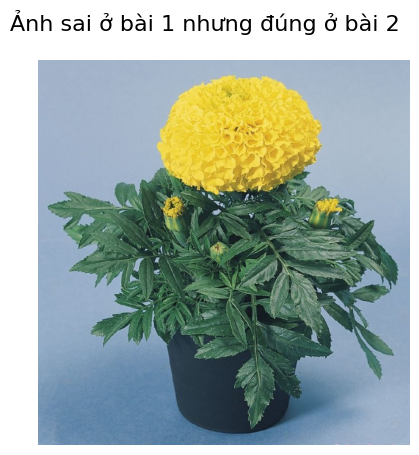

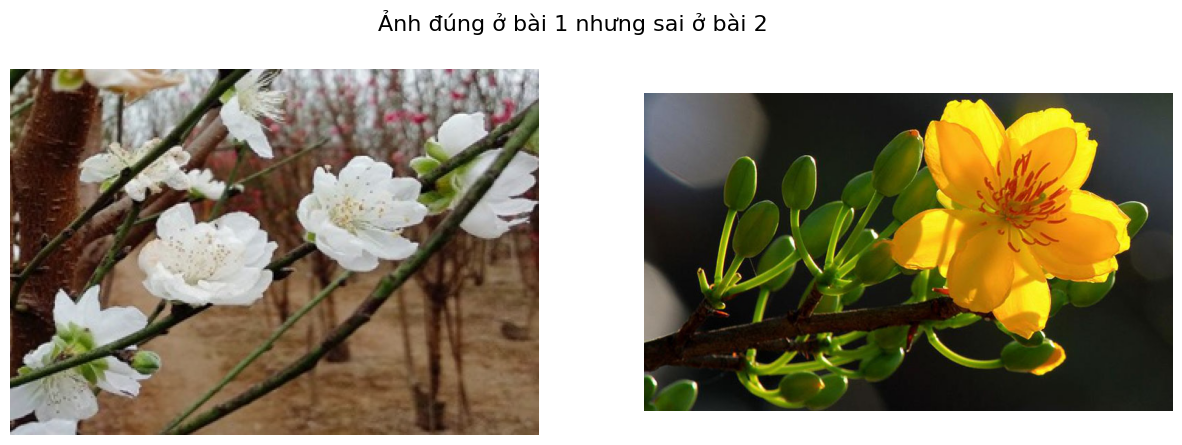

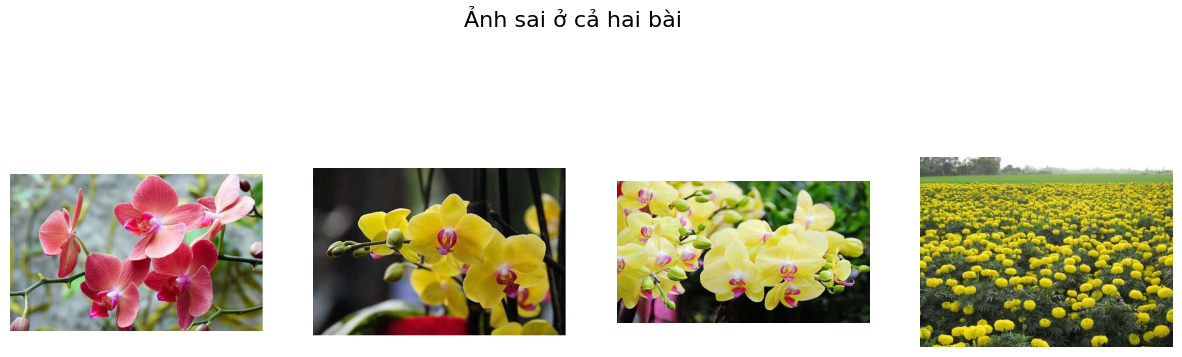


Accuracy RGB Histogram: 0.9000
Accuracy HSV Histogram: 0.8800


In [18]:
def extract_rgb_histogram(image_path, bins=(8, 8, 8)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

def extract_hsv_histogram(image_path, bins=(16, 16, 16)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

def load_dataset2(dataset_path, feature_extractor):
    data, labels, image_paths = [], [], []
    label_dict = {name: idx for idx, name in enumerate(["Cuc", "Dao", "Lan", "Mai", "Tho"])}

    for category in label_dict.keys():
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            for image_name in os.listdir(category_path):
                image_path = os.path.join(category_path, image_name)
                if image_name.lower().endswith('.jpg'):
                    feature = feature_extractor(image_path)
                    data.append(feature)
                    labels.append(label_dict[category])
                    image_paths.append(image_path)
    return np.array(data), np.array(labels), image_paths

train_data_rgb, train_labels, _ = load_dataset2(os.path.join(dataset_path, "train"), extract_rgb_histogram)
test_data_rgb, test_labels, test_paths = load_dataset2(os.path.join(dataset_path, "test"), extract_rgb_histogram)

train_data_hsv, _, _ = load_dataset2(os.path.join(dataset_path, "train"), extract_hsv_histogram)
test_data_hsv, _, _ = load_dataset2(os.path.join(dataset_path, "test"), extract_hsv_histogram)

knn_rgb = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='braycurtis')
knn_rgb.fit(train_data_rgb, train_labels)
predictions_rgb = knn_rgb.predict(test_data_rgb)

knn_hsv = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='braycurtis')
knn_hsv.fit(train_data_hsv, train_labels)
predictions_hsv = knn_hsv.predict(test_data_hsv)

correct_rgb_wrong_hsv = []
wrong_rgb_correct_hsv = []
wrong_rgb_wrong_hsv = []

for i, (true_label, pred_rgb, pred_hsv) in enumerate(zip(test_labels, predictions_rgb, predictions_hsv)):
    if pred_rgb == true_label and pred_hsv != true_label:
        correct_rgb_wrong_hsv.append(test_paths[i])
    elif pred_rgb != true_label and pred_hsv == true_label:
        wrong_rgb_correct_hsv.append(test_paths[i])
    elif pred_rgb != true_label and pred_hsv != true_label:
        wrong_rgb_wrong_hsv.append(test_paths[i])


def show_images2(image_paths, title):
    if not image_paths:
        print(f"Không có ảnh nào trong danh mục: {title}")
        return

    fig, axes = plt.subplots(1, min(5, len(image_paths)), figsize=(15, 5))
    fig.suptitle(title, fontsize=16)

    if len(image_paths) == 1:
        axes = [axes]

    for ax, img_path in zip(axes, image_paths[:5]):
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)
        ax.axis('off')

    plt.show()
    return fig, axes
show_images2(wrong_rgb_correct_hsv, "Ảnh sai ở bài 1 nhưng đúng ở bài 2")
show_images2(correct_rgb_wrong_hsv, "Ảnh đúng ở bài 1 nhưng sai ở bài 2")
show_images2(wrong_rgb_wrong_hsv, "Ảnh sai ở cả hai bài")

accuracy_rgb = accuracy_score(test_labels, predictions_rgb)
accuracy_hsv = accuracy_score(test_labels, predictions_hsv)
print(f"\nAccuracy RGB Histogram: {accuracy_rgb:.4f}")
print(f"Accuracy HSV Histogram: {accuracy_hsv:.4f}")